In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import csv
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Data
maxInt = sys.maxsize
while True:
    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

content = pd.read_csv('../data/content-clean.csv', engine='python')

In [3]:
articles = pd.read_csv('../whyr_hack/data/articles-with-topics.csv')

In [4]:
data = pd.merge(content, articles, on='url', how='inner')

In [5]:
data['article_length'] = data.text.str.len()

In [6]:
article_length_mean = data.groupby('topic').article_length.mean().round(2).reset_index().sort_values(by='article_length')

<AxesSubplot:xlabel='article_length', ylabel='topic'>

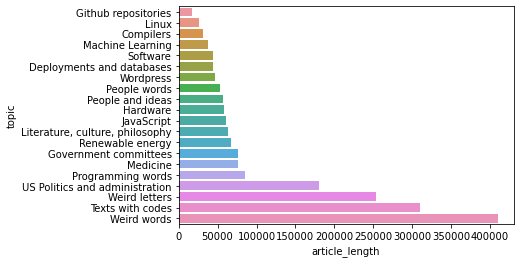

In [7]:
sns.barplot(x='article_length', y='topic', data=article_length_mean, orient='horizontal')

In [13]:
data.sort_values(by='article_length', ascending=False)

,url,text,by,descendants,id,kids,score,time,title,type,topic,article_length
2575,https://www.quiverquant.com/sources/senatetrading,Quiver Quantitative window.dataLayer = window....,greatwave1,35,23133624,23135480 23135374 23134952 23134837 23134832 2...,119,2020-05-10 18:02:37,Show HN: Tracking stock trading by US Senators,story,Texts with codes,8451991
5571,https://slayersclub.bethesda.net/en/article/48...,Expert overclockers successfully push DOOM Ete...,austinprete,67,24280218,24310323 24309651 24309698 24312961 24311357 2...,78,2020-08-26 09:58:57,Expert overclockers successfully push DOOM Ete...,story,Hardware,4448784
3962,https://order.storekit.com/product,SK Takeaway | Simple Online Ordering Software/...,benlarcey,20,22967255,22967343 22971037 22974260 22974192 22977306 2...,78,2020-04-24 14:33:01,Show HN: A free online ordering system for res...,story,Weird words,3267474
2844,https://www.cnbc.com/2020/05/06/ny-gov-cuomo-s...,Cuomo: Most new NY coronavirus hospitalization...,prostoalex,75,23108188,23109587 23108312 23112495 23108914 23108901 2...,71,2020-05-07 22:54:57,Most new NY coronavirus hospitalizations are f...,story,Weird words,1982977
4711,https://www.cnbc.com/2020/09/04/worries-grow-o...,Worries grow over a K-shaped economic recovery...,rchaudhary,76,24393282,24394153 24394252 24393672 24393633 24394256 2...,65,2020-09-06 20:02:55,Worries grow over a K-shaped economic recovery...,story,Weird words,1865329
...,...,...,...,...,...,...,...,...,...,...,...,...
4658,https://habitica.com/static/home,Habitica - Gamify Your Life,ycombinete,101,24389064,24390089 24390375 24392003 24393304 24389649 2...,164,2020-09-06 06:51:18,Habitica – A gamified habit-building and produ...,story,People words,27
841,https://duckduckgo.com/billboards/,DuckDuckGo Billboards,fukumoto,55,23350057,23350696 23350673 23350992 23351040 23350729 2...,47,2020-05-29 16:03:09,DuckDuckGo Billboards,story,Linux,21
5383,http://www.lordofthemanor.io/,Lord of the Manor\n,morrishsieh,22,24320277,24321135 24321129 24322442 24321428 24320981 2...,158,2020-08-30 02:02:42,Lord of the Manor: a medieval city builder game,story,"Literature, culture, philosophy",18
2975,https://saltexploit.com/,SaltExploit\n,photon-torpedo,90,23078421,23080987 23081032 23083383 23084421 23082609 2...,157,2020-05-05 12:25:39,SaltStack Mining Attack,story,Github repositories,12


In [11]:
plot_data = article_length_mean

fig = px.bar(
    plot_data,
    x = 'topic',
    y = 'article_length',
    title = 'Average article length per topic'
)

fig.update_layout(
    xaxis = {
        'title': 'Topic',
        'categoryorder': 'total descending'
    },
    yaxis = {
        'title': 'Average length'
    }
)

fig.write_image('../whyr_hack/challenge4/results/plots-articles-with-topics/average-topic-length.png')